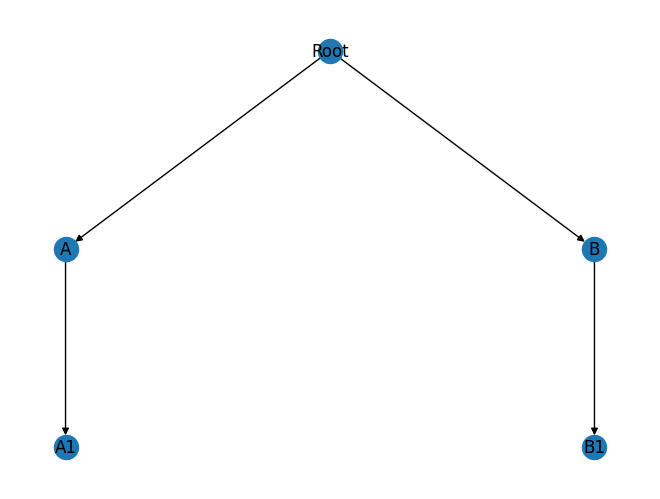

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph (tree)
G = nx.DiGraph()
edges = [("Root", "A"), ("Root", "B"), ("A", "A1"), ("B", "B1")]
G.add_edges_from(edges)

# Draw the tree
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # hierarchical layout
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

In [ ]:
from py_algos_eseidinger.complexity.varianttree import (
    VariantNode,
)


class Vertice:
    """
    A vertice in a graph.
    """

    def __init__(self, variant_node: VariantNode, pos: tuple):
        """
        Initialize a vertice with a variant node and its position.
        :param variant_node: The variant node associated with this vertice.
        :param pos: The position of the vertice in the graph.
        """
        self.variant_node = variant_node
        self.pos = pos
        self.size = 300
        self.color = "green"


class Edge:
    """
    An edge in a graph.
    """

    def __init__(self, source: Vertice, target: Vertice):
        """
        Initialize an edge with a source and target vertice.
        :param source: The source vertice of the edge.
        :param target: The target vertice of the edge.
        """
        self.source = source
        self.target = target


def tree_to_edge_list(tree: VariantNode) -> tuple[list[Edge], list[Vertice]]:
    """
    Convert a variant tree to a list of edges.
    :param tree: The root node of the variant tree.
    :return: A list of edges representing the tree structure.
    """
    edges = []
    vertices = []

    total_width = len(tree.get_leafs())

    def traverse(node: VariantNode, source: Vertice):
        vertices.append(source)
        subtree_width = len(node.get_leafs())
        cur_x = source.pos[0] - subtree_width / 2
        for child in node.children:
            child_tree_width = len(child.get_leafs())
            child_x = cur_x + child_tree_width / 2
            child_y = source.pos[1] - 1
            target = Vertice(child, (child_x, child_y))
            edges.append(Edge(source, target))
            traverse(child, target)
            cur_x += child_tree_width

    root_x = total_width / 2
    root_vertice = Vertice(tree, (root_x, 0))

    traverse(tree, root_vertice)
    return (edges, vertices)

In [11]:
import matplotlib.pyplot as plt


def plot_edge_list(edges: list[Edge], vertices: list[Vertice], width=10, height=5):
    """
    Plot a list of edges as a directed graph.
    :param edges: A list of Edge objects.
    """
    plt.figure(figsize=(width, height))
    for edge in edges:
        x0, y0 = edge.source.pos
        x1, y1 = edge.target.pos
        plt.plot([x0, x1], [y0, y1], "k-", zorder=1)
    for vertice in vertices:
        plt.scatter(
            vertice.pos[0],
            vertice.pos[1],
            s=vertice.size,
            color=vertice.color,
            zorder=2,
        )
        plt.text(
            vertice.pos[0],
            vertice.pos[1],
            vertice.variant_node.symbols_to_string(),
            ha="center",
            va="center",
            zorder=3,
            fontsize=12,
        )
    plt.axis("off")
    plt.show()

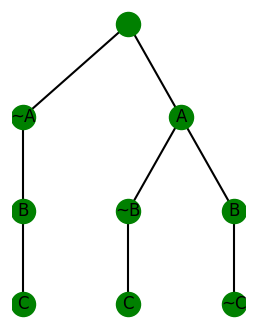

In [12]:
from sympy import symbols
from py_algos_eseidinger.complexity.varianttree import (
    VariantNode,
    Variant,
    Attribute,
    Condition,
    Part,
)

A, B, C = symbols("A, B, C")  # pylint: disable=invalid-name
symbol_order = [[A], [B], [C]]
root_variant = VariantNode.create_root_variant(symbol_order)

variant_1 = Variant([Attribute(A, True), Attribute(B, True), Attribute(C, False)])
variant_2 = Variant([Attribute(A, True), Attribute(B, False), Attribute(C, True)])
variant_3 = Variant([Attribute(A, False), Attribute(B, True), Attribute(C, True)])
possible_variants = [variant_1, variant_2, variant_3]

part_1 = Part("Part 1", Condition(B & (A | C)))
part_2 = Part("Part 2", Condition(C & (A | B)))
all_conditionals = [part_1, part_2]

tree = VariantNode([], root_variant, symbol_order, possible_variants, all_conditionals)

# edge_list = tree.to_edge_list()
# plot_tree(edge_list)

edges, vertices = tree_to_edge_list(tree)
width = len(tree.get_leafs())
height = tree.get_height()
plot_edge_list(edges, vertices, width, height)

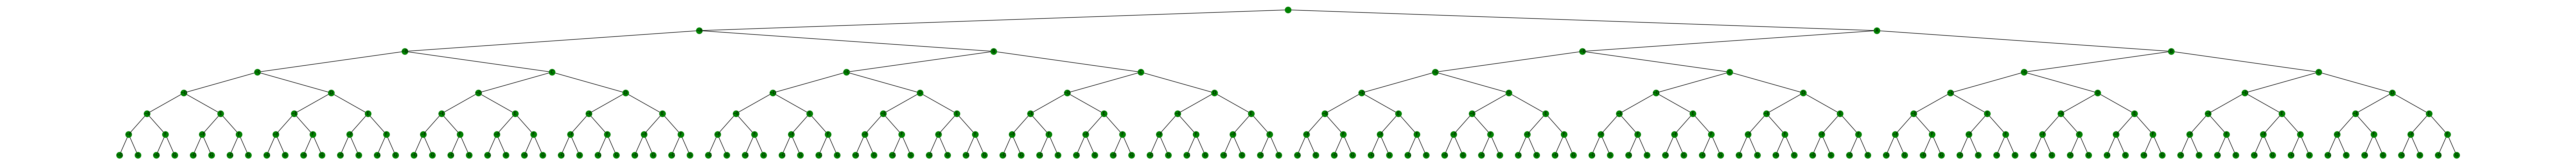

In [13]:
from sympy import symbols
from py_algos_eseidinger.complexity.varianttree import (
    VariantNode,
    Variant,
    Attribute,
    Condition,
    Part,
)

# Create 10 symbols
A, B, C, D, E, F, G = symbols("A B C D E F G")  # pylint: disable=invalid-name
ungrouped_symbols = [A, B, C, D, E, F, G]  # pylint: disable=invalid-name
symbol_order = [[A], [B], [C], [D], [E], [F], [G]]
root_variant = VariantNode.create_root_variant(symbol_order)

# Create all possible variants for the 10 symbols
variants = []
for i in range(2**10):
    attributes = [
        Attribute(symbol, bool(i & (1 << idx)))
        for idx, symbol in enumerate(ungrouped_symbols)
    ]
    variants.append(Variant(attributes))

tree = VariantNode([], root_variant, symbol_order, variants, [])
edges, vertices = tree_to_edge_list(tree)
width = len(tree.get_leafs())
height = tree.get_height()
plot_edge_list(edges, vertices, width, height)